# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [74]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./Data/train.p"
testing_file = "./Data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
#print(X_test[0].dtype)

uint8


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [15]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1
#print(X_train.shape)
#print(y_train.shape)
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

The labels and frequency of each label is provided above each image:


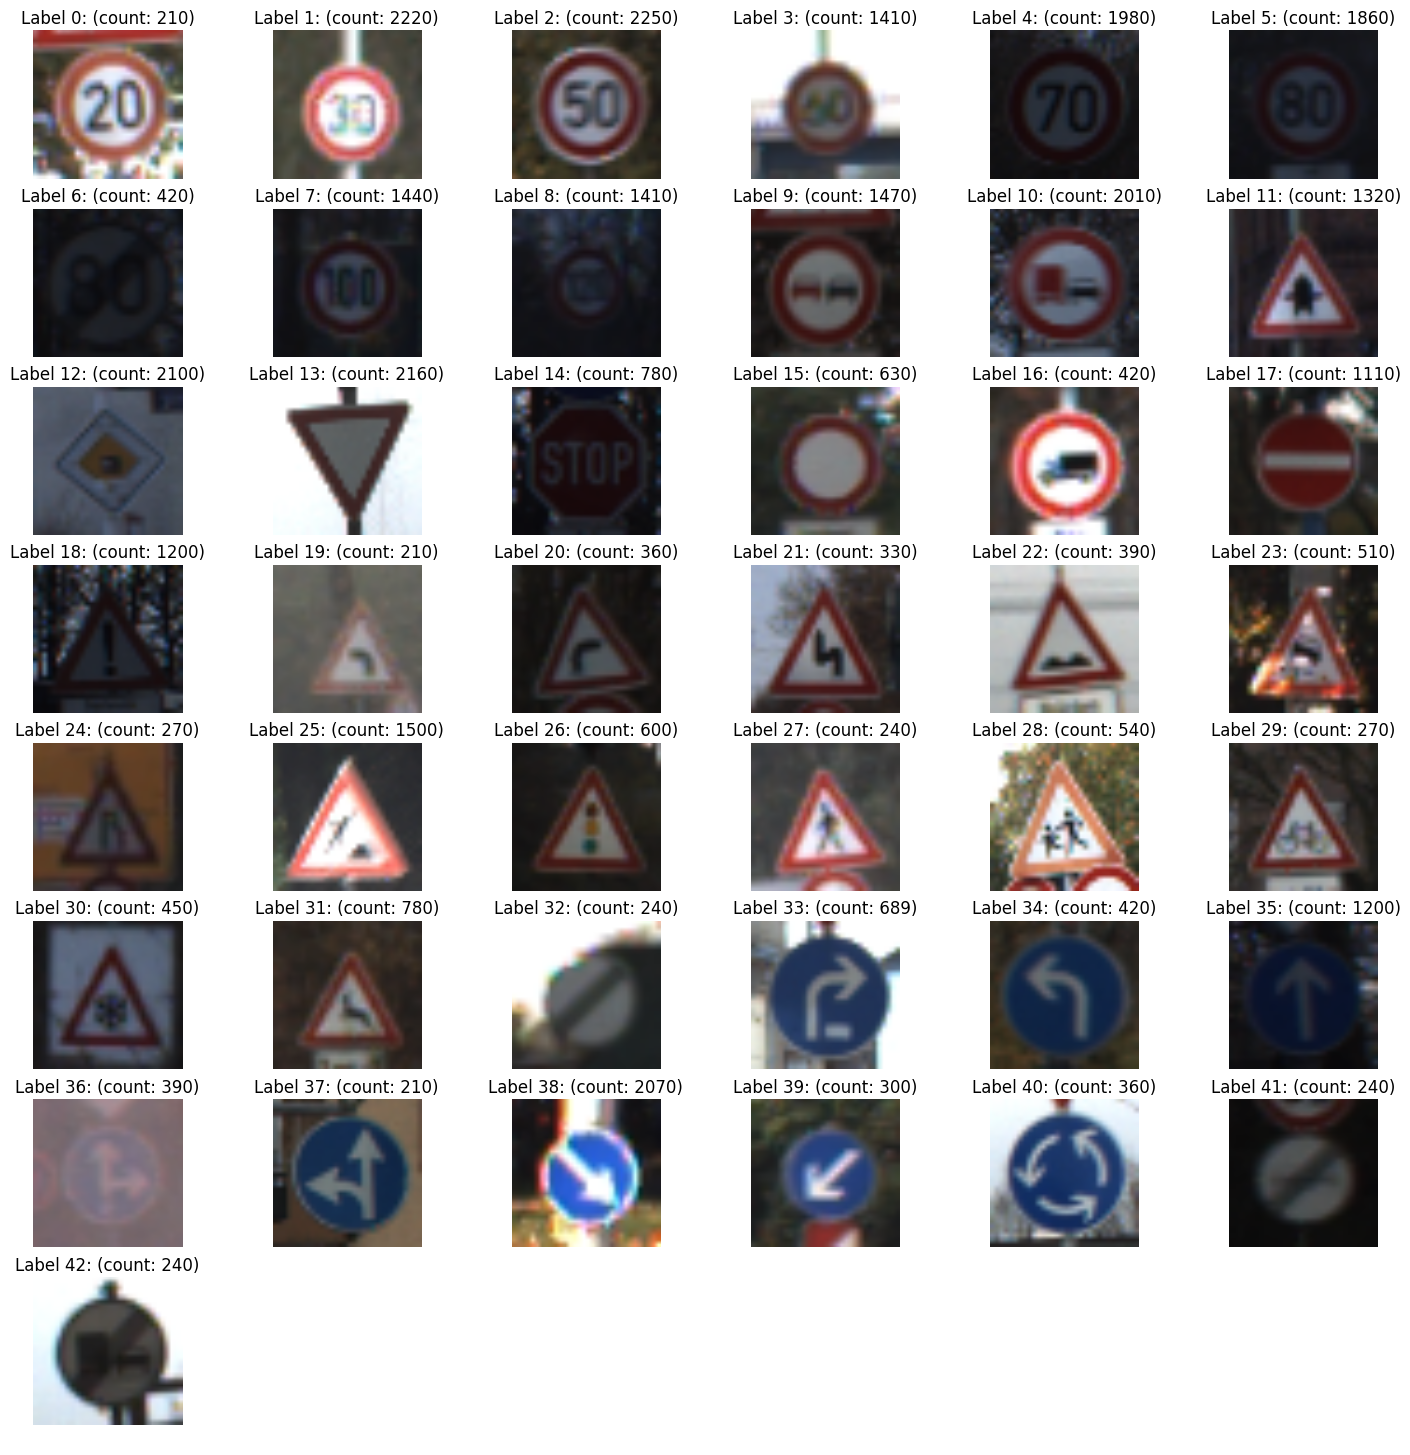

In [115]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

#Compute the unique labels and their frequency
unique, counts = np.unique(y_train, return_counts=True) 

#Declare the size of the each figure
plt.figure(figsize=(18, 18))

i = 1
low_index = 0 #Initialize lower index
for label in range(0, n_classes):
    high_index = low_index + counts[label,] #Class upper index
    index = random.randint(low_index, high_index) #Select random index between low and high index specific class
    low_index = high_index #Set class lower range to current high index
   
    image = X_train[index] #print a random image for the specific label
    plt.subplot(8, 6, i)
    plt.axis('off')
    
    #Print the label and frequency
    plt.title("Label {0}: (count: {1})".format(label, counts[label,]))
    #print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))
    i += 1
    _ = plt.imshow(image)
print("The labels and frequency of each label is provided above each image:")
plt.show() 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Generating Additional Data

The code snippet below creates additional data for a more evenly distributed frequency of classes.

In [17]:
#Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

def Image_Jitter(img):
    rows, cols, ch = img.shape
    shear = 5
    
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    
    pt1 = 5+shear*np.random.uniform()-shear/2
    pt2 = 20+shear*np.random.uniform()-shear/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    
    M = cv2.getAffineTransform(pts1,pts2)
    new_img = cv2.warpAffine(img,M,(cols,rows))

    #plt.subplot(121),plt.imshow(img),plt.title('Input')
    #plt.subplot(122),plt.imshow(new_img),plt.title('Output')
    #plt.show()
    return new_img

unique, counts = np.unique(y_train, return_counts=True) #initial count
low_index = 0
count_threshold = 2000
aug_images = []
aug_labels = []

for label in range(0, n_classes): #n_classes
    #set upper and lower index for label
    high_index = low_index + counts[label,]-1 #Class upper index 
    diff = count_threshold - counts[label,]  
    
    while diff > 0:
        index = random.randint(low_index, high_index)  #Select random index between low and high index specific class
        image = X_train[index] #print a random image for the specific label
        new_image = Image_Jitter(image)
        aug_images.append(new_image)
        aug_labels.append(label)
        diff -= 1    
   
    Augmented_images = np.squeeze([aug_images])
    Augmented_labels = np.squeeze([aug_labels])   
   
    low_index = high_index+1 #Set class lower range to current high index

#Append augmented images and labels to existing training data
Augmented_X_train = np.concatenate((X_train, Augmented_images), axis=0)
Augmented_y_train = np.concatenate((y_train, Augmented_labels), axis=0)

#print("TOTAL DATA")
#print(Augmented_X_train.shape)
#print(Augmented_y_train.shape)

n_Aug_train = len(Augmented_X_train)
aug_unique, aug_counts = np.unique(Augmented_y_train, return_counts=True)
#print(Augmented_X_train.dtype)
print("Initial size of training data =", len(X_train))
print("Number of augmented data created =", len(Augmented_images))
print("Total training data with augmented data = ", n_Aug_train)

print("\nThe new frequency of each label for the augmented training data is provided below:")
print("Label    (Frequency)")
print("====================")
for label in range(0, n_classes):
    print("Label {0}: ({1}) ".format(label, aug_counts[label,]))

#plt.imshow(Augmented_X_train[20809])
#print("label: {0}".format(Augmented_y_train[20809]))

Initial size of training data = 39209
Number of augmented data created = 47601
Total training data with augmented data =  86810

The new frequency of each label for the augmented training data is provided below:
Label    (Frequency)
Label 0: (2000) 
Label 1: (2220) 
Label 2: (2250) 
Label 3: (2000) 
Label 4: (2000) 
Label 5: (2000) 
Label 6: (2000) 
Label 7: (2000) 
Label 8: (2000) 
Label 9: (2000) 
Label 10: (2010) 
Label 11: (2000) 
Label 12: (2100) 
Label 13: (2160) 
Label 14: (2000) 
Label 15: (2000) 
Label 16: (2000) 
Label 17: (2000) 
Label 18: (2000) 
Label 19: (2000) 
Label 20: (2000) 
Label 21: (2000) 
Label 22: (2000) 
Label 23: (2000) 
Label 24: (2000) 
Label 25: (2000) 
Label 26: (2000) 
Label 27: (2000) 
Label 28: (2000) 
Label 29: (2000) 
Label 30: (2000) 
Label 31: (2000) 
Label 32: (2000) 
Label 33: (2000) 
Label 34: (2000) 
Label 35: (2000) 
Label 36: (2000) 
Label 37: (2000) 
Label 38: (2070) 
Label 39: (2000) 
Label 40: (2000) 
Label 41: (2000) 
Label 42: (2000) 


### Data Preprocessing

The data is first converted to grayscale and then normalized for a range between 0.1 to 0.9.

In [72]:
#Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import tensorflow as tf

def Norm_Image(img):
    n_img = len(img)
    
    ##Grayscale the training images.
    process_images32 = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in img[0:n_img,]], dtype=np.float32)
    #print(np.amin(process_images32[1]))
    #print(np.amax(process_images32[1]))
    #print(process_images32[56])
    #plt.imshow(process_images32[210], cmap='gray')

    ##Nomalize the grayscaled images.
    norm_images32 = np.array([MinMaxScaler((0.1, 0.9)).fit_transform(image) for image in process_images32])
    #print(norm_images32.shape)
    #print(np.amin(norm_images32[1]))
    #print(np.amax(norm_images32[1]))
    
    
    #Added the last dimension changing the shape from (#_of_data X 32 X 32) -> (#_of_data X 32 X 32 X 1)
    norm_X_train = norm_images32[:, :, :, None]
    #print(np.amin(norm_X_train[1]))
    #print(np.amax(norm_X_train[1]))
    #print(norm_X_train[56])
    
    return norm_X_train

Augmented_X_train = np.array(Augmented_X_train, dtype=np.float32)
X_testfloat = np.array(X_test, dtype=np.float32)
Norm_X_train = Norm_Image(Augmented_X_train)
Norm_X_test = Norm_Image(X_testfloat)
print("Preprocessing complete on training and test data!")
#plt.imshow(Augmented_X_train[209], cmap = 'gray')
#print("label: {0}".format(Augmented_y_train[209]))


Preprocessing complete on training and test data!


### Deep Neural Network

The LENET deep network was used for the image problem.

### Question 1

_Describe how you preprocessed the data. Why did you choose that technique?_


**Answer:**
The image was first converted to grayscale and then normalized using the MinMaxScaler from the sklearn library. While reviewing the images, I noticed there were images taken in very low-lighting. Obtaining a grayscale image of the road signs makes the data less susceptible to luminous variability. By converting the image to grayscale and then normalizing, the data is much more suited for training the model.

In [19]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42
#print(Norm_X_train.shape)
#print(Augmented_y_train.shape)

X_train, X_validation, y_train, y_validation = train_test_split(Norm_X_train, Augmented_y_train, test_size=0.3, random_state=42)

#for train_index, test_index in s.split(X_train, y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
     #   X_train, X_test = X_data[train_index], X_data[test_index]
    #y_train, y_test = y_data[train_index], y_data[test_index]
#X_train, X_validation, y_train, y_validation = StratifiedShuffleSplit(X_train, y_train, test_size=0.2, random_state=0)


print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(Norm_X_test)))

#print(X_train.shape)
#print(y_train.shape)
#print(X_validation.shape)
#print(y_validation.shape)

unique, counts = np.unique(y_train, return_counts=True)

#plt.title("Label {0}: (count: {1})".format(y_validation[43523]))
#print(X_validation[23523])

#Consider using the http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Training Set:   60767 samples
Validation Set: 26043 samples
Test Set:       12630 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The data was first augmented due to the sparse distribution of the road sign images. Unevenly distributed labels can result in the network selecting labels with overwhelming high training data over those with sparse data. Additional images were created only for labels with a frequency count less than 2000 images. This allowed all label classes to have frequency counts of about 2000. To create additional images, the images in the training set were manipulated and added to the existing set.

The augmented data was split to X_train and X_validation data using sklearn utility. The original test data provided at the beginning of the project was kept the same.

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

EPOCHS = 10
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    n_classes = 43
    
    weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal(shape=(5*5*16, 120), mean = mu, stddev = sigma)),
    'out1': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
    'out2': tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))}

    biases = {
    'bc1': tf.Variable(tf.zeros(6)),
    'bc2': tf.Variable(tf.zeros(16)),
    'bd1': tf.Variable(tf.zeros(120)),
    'out1': tf.Variable(tf.zeros(84)),
    'out2': tf.Variable(tf.zeros(n_classes))}
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv_layer1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    conv_layer1 = tf.nn.bias_add(conv_layer1, biases['bc1'])

    # TODO: Activation.
    conv_layer1 = tf.nn.relu(conv_layer1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    k = 2
    conv_layer1 = tf.nn.max_pool(conv_layer1, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv_layer2 = tf.nn.conv2d(conv_layer1, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    conv_layer2 = tf.nn.bias_add(conv_layer2, biases['bc2'])
    
    # TODO: Activation.
    conv_layer2 = tf.nn.relu(conv_layer2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    k = 2
    conv_layer2 = tf.nn.max_pool(conv_layer2, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat_conv2 = tf.reshape(conv_layer2, [-1, weights['wd1'].get_shape().as_list()[0]])
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc3 = tf.add(tf.matmul(flat_conv2, weights['wd1']), biases['bd1'])
    
    # TODO: Activation.
    fc3 = tf.nn.relu(fc3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc4 = tf.add(tf.matmul(fc3, weights['out1']), biases['out1'])
    
    # TODO: Activation.
    fc4 = tf.nn.relu(fc4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc4, weights['out2']), biases['out2'])
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
My architecture is similar to the Lenet 5 model. I changed the output to 43 classes since this is the number of unique classes in the data provided. The Lenet model consists of two convolution layers each followed by a pooling layer. 

The first convolution layer takes the 32X32X1 image and produces a 28X28X6 output. This is accomplished by carefully selecting the filter parameters to 5x5x1x6, where 5x5x1 is the filter patch and 6 is the depth of the convolution layer. By setting the stride height and width to 1 and the padding the VALID, the output layer will have a dimension of 28X28X6 using the corresponding formula below:

$$
height_{output} = ceil\Bigg[\frac{(height_{input}-height_{filter}+1)} {(height_{stride})}\Bigg]
$$ 

$$ 
width_{output} = ceil\Bigg[\frac{(width_{input}-width_{filter}+1)} {(width_{stride})}\Bigg]
$$ 

The pooling layer then selects the highest value from a frame window as it's output. This reduces the size of the output field even further.

The combination of the convolution layers and pooling layers allow the model to discern components of the image like lines and shapes. The output from the convolution and pooling layers are flattened and fed into a multilayer perceptron network that is able to discern high level characteristics of the input data.

In [21]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation 

_The code below shows the presents a function to evaluate the deep network_


In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training Nework 

_This section provides code used to train the nework_


In [23]:
### Train your model here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, '.\lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.744

EPOCH 2 ...
Validation Accuracy = 0.847

EPOCH 3 ...
Validation Accuracy = 0.896

EPOCH 4 ...
Validation Accuracy = 0.913

EPOCH 5 ...
Validation Accuracy = 0.934

EPOCH 6 ...
Validation Accuracy = 0.931

EPOCH 7 ...
Validation Accuracy = 0.949

EPOCH 8 ...
Validation Accuracy = 0.950

EPOCH 9 ...
Validation Accuracy = 0.958

EPOCH 10 ...
Validation Accuracy = 0.957

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I set my batch size and epoch to 128 and 10, respectively. The learning rate was set to 0.001 to allow for more efficient training. I noticed a smaller learning rate made the network more robust. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started off with the LeNet 5 model. I chose this technique because it provided good results when used in discerning images. To make it suitable for the application, I converted the images to grayscale and then normalized it to values from 0.1 to 0.9 using the MinMaxScaler from the sklearn library.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

filenames: ./Data/captured_images/30kmh_sign_edit.jpg

filenames: ./Data/captured_images/Right of Way edit.jpg

filenames: ./Data/captured_images/Road Work Sign edit.jpg

filenames: ./Data/captured_images/Slippery Road Sign edit.jpg

filenames: ./Data/captured_images/Test Stop Edit.jpg

These are the captured images with their true labels:


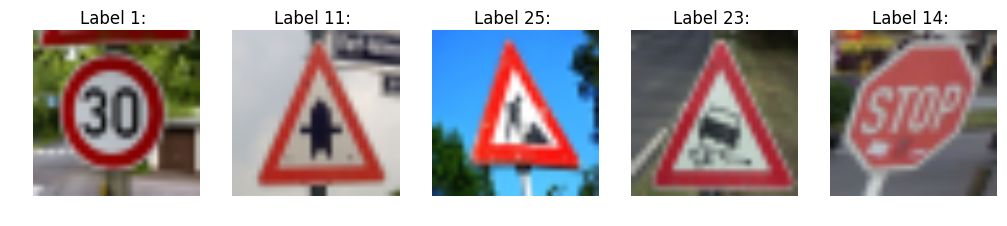

In [124]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2
import os, sys
test_images = []
#test_labels = [18, 11, 37, 24, 14]
test_labels = [1, 11, 25, 23, 14]
dir = "./Data/captured_images/"

size = (32,32)
 
filenames = [os.path.join(dir, f) for f in os.listdir(dir) if f.endswith(".jpg")]

plt.figure(figsize=(15, 15))
i = 1
for file in filenames:
    plt.subplot(2, 6, i)
    plt.axis('off')
    image = cv2.imread(file) 
    resized_image = cv2.resize(image, size, interpolation = cv2.INTER_AREA)
    test_images.append(resized_image)  
    print("filenames: {0}\n".format(file))
    #Print the label 
    plt.title("Label {0}: ".format(test_labels[i-1]))
    i += 1
    _ = plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
print("These are the captured images with their true labels:")
plt.show()  

#testimage
#plt.imshow(cv2.cvtColor(test_images[2], cv2.COLOR_BGR2RGB))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The code below pulls random images from the test data and shows how the actual label compares with the predicted label. In the example below, the 20 random images were pulled and 3 failed - an accuracy of 85%. The failed images shown below were misclassified because they were too dark.

Accuracy: 85.00000238418579%
Actual Label || Predicted Label
38	||	38
4	||	4
1	||	1
26	||	26
13	||	13
18	||	18
35	||	3
7	||	7
3	||	33
2	||	2
1	||	1
7	||	7
31	||	31
35	||	35
7	||	3
18	||	18
38	||	38
42	||	42
8	||	8
2	||	2


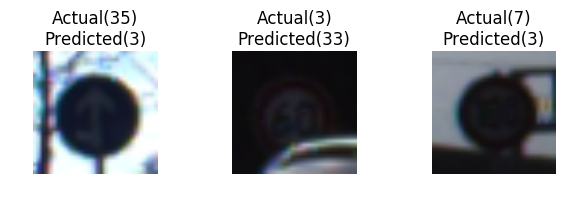

In [91]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
sample_indexes = random.sample(range(len(Norm_X_test)), 20)
sample_images = [Norm_X_test[i] for i in sample_indexes]
sample_labels = [y_test[i] for i in sample_indexes]
failed_pred= []
X_test = X_test.view('uint8')
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    #for i in range(len(sample_images)):
    predicted = sess.run(tf.argmax(logits, 1), feed_dict={x: sample_images, y: sample_labels})
    accuracy = sess.run(accuracy_operation, feed_dict={x: sample_images, y: sample_labels})
    #print(sample_labels)
    # print(predicted)
    count = 1
    plt.figure(figsize=(15, 15))
    print("Accuracy: {0}%".format(accuracy*100))
    print("Actual Label || Predicted Label")
    print("===============================")
    for i in range(len(sample_images)):
        print("{0}\t||\t{1}".format(sample_labels[i], predicted[i]))
        if predicted[i] != sample_labels[i]:
            failed_pred.append(sample_images[i])
            plt.subplot(8, 6, count)
            plt.axis('off')
            plt.title("Actual({0})\nPredicted({1})".format(sample_labels[i], predicted[i]))
            #print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))
            #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            #_ = plt.imshow(cv2.cvtColor(X_test[sample_indexes[i]], cv2.COLOR_BGR2RGB))
            _ = plt.imshow(X_test[sample_indexes[i]])
            count += 1
    plt.show()      
    

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The test images used are displayed above. These images were resized and normalized before entering them into the model. 5 out of the 5 images were identified correctly by the model.

In [125]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
#Normalize test images
test_images = np.array(test_images, dtype=np.float32)
sample_images = Norm_Image(test_images)
sample_labels = test_labels 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    #for i in range(len(sample_images)):
    predicted = sess.run(tf.argmax(logits, 1), feed_dict={x: sample_images, y: sample_labels})
    accuracy = sess.run(accuracy_operation, feed_dict={x: sample_images, y: sample_labels})
    #print(sample_labels)
    # print(predicted)
    print("Accuracy: {0}%".format(accuracy*100))
    print("Actual Label || Predicted Label")
    print("===============================")
    for i in range(len(sample_images)):
        print("{0}\t||\t{1} ".format(sample_labels[i], predicted[i]))

Accuracy: 100.0%
Actual Label || Predicted Label
1	||	1 
11	||	11 
25	||	25 
23	||	23 
14	||	14 


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [130]:
### Used the test data to 
#sample_images = Norm_X_test
#sample_labels = y_test 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: sample_images, y: sample_labels})
    a = sess.run(tf.nn.top_k(prob, k=5), feed_dict={x: sample_images, y: sample_labels})
    print(a)
    #sess.run(tf.nn.top_k(logits, k=5))
    #for i in range(len(sample_images)):
    #predicted = sess.run(tf.argmax(logits, 1), feed_dict={x: sample_images, y: sample_labels})
    #accuracy = sess.run(accuracy_operation, feed_dict={x: sample_images, y: sample_labels})
    #print(sample_labels)
    # print(predicted)
    print("Accuracy: {0}%".format(accuracy*100))
    print("Actual Label || Predicted Label")
    print("===============================")
    #for i in range(len(sample_images)):
    #   print("{0}\t||\t{1} ".format(sample_labels[i], predicted[i]))

TopKV2(values=array([[  9.99900103e-01,   7.92855208e-05,   1.42285107e-05,
          3.52249526e-06,   2.55793793e-06],
       [  9.99955416e-01,   3.80710044e-05,   3.70444059e-06,
          2.83566760e-06,   1.90588061e-08],
       [  9.99989033e-01,   8.41696510e-06,   1.93752362e-06,
          5.77650212e-07,   4.49211370e-08],
       [  9.99998331e-01,   1.09168445e-06,   4.07161167e-07,
          6.96125042e-08,   2.74076175e-08],
       [  9.99996662e-01,   2.46423065e-06,   5.89979891e-07,
          1.50649683e-07,   1.30900190e-07]], dtype=float32), indices=array([[ 1,  5,  0,  8,  2],
       [11, 27, 28, 30, 21],
       [25, 22, 18, 27, 26],
       [23, 30, 11, 29, 19],
       [14, 13, 38, 36,  8]]))
Accuracy: 100.0%
Actual Label || Predicted Label


**Answer:**
From the results above the all images had a logit close to 20 for k=1. The next predicted values (k=2) were much lower for the captured images. The **Slippery Road** (label 23) had the highest certainty of 0.99998331.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.